Activation function이 어떻게 작동하는지 시각화 해보자


https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

위의 post 보고 작성

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
#
import torch
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler
import torch.nn as nn 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import torch.nn.functional as F


In [ ]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  
y = x.pow(2) + 0.2*torch.rand(x.size())  

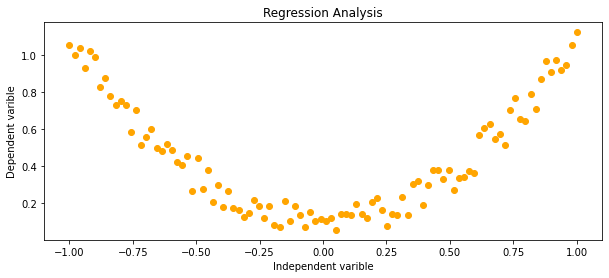

In [ ]:
# auto grad
x, y = Variable(x), Variable(y)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

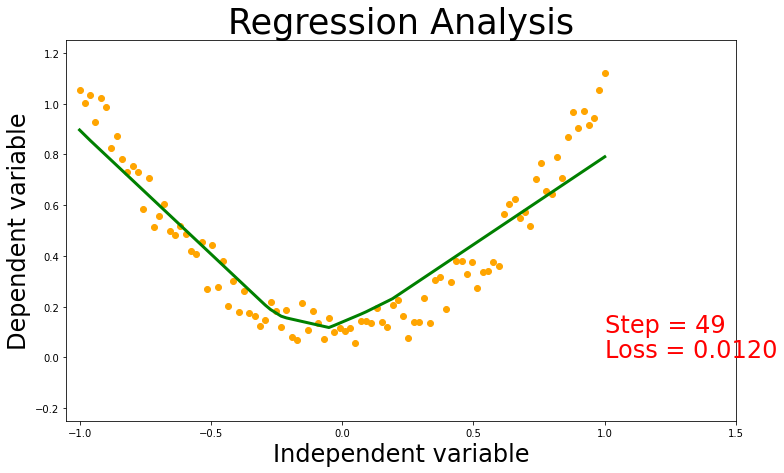

In [ ]:

import imageio
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []

fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(50):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
   

# save images as a gif    
imageio.mimsave('./curve_1.gif', my_images, fps=10)

## non linear activation 안쓰면 이렇게됨

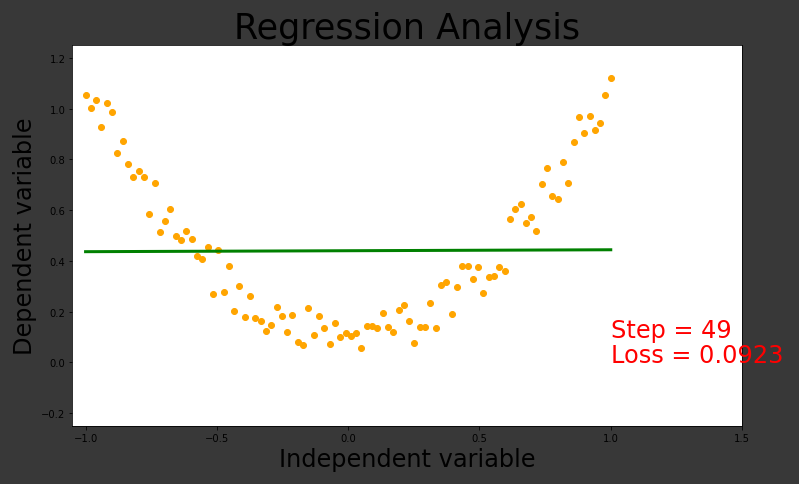

In [ ]:
from google.colab import files
files.download('curve_1.gif') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

이렇게 복잡한거는 위의 모델로 부족함


In [ ]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )


#이거쓰면 해결완료